<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [6]:
#Importation de la librairie Pandas
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [9]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv("sous_nutrition.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [12]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [13]:
#Consulter le nombre de colonnes
print("il y a", population.shape[1], "colonnes dans le fichier population")
#La nature des données dans chacune des colonnes
print(population.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("il y a", population.shape[0], "lignes dans le fichier population")

il y a 3 colonnes dans le fichier population
Zone       object
Année       int64
Valeur    float64
dtype: object
il y a 1416 lignes dans le fichier population


In [14]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [15]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population["Valeur"] = population["Valeur"]*1000

In [16]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={"Valeur":"Population"})

In [17]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [19]:
#Afficher les dimensions du dataset
print("lignes et colonnes")
dispo_alimentaire.shape

lignes et colonnes


(15605, 18)

In [20]:
#Consulter le nombre de colonnes
print("il y a", dispo_alimentaire.shape[1], "colonnes")

il y a 18 colonnes


In [21]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [22]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [23]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire.iloc[:,-9:] = dispo_alimentaire.iloc[:,-9:]*1000000
dispo_alimentaire.iloc[:, 3:5] = dispo_alimentaire.iloc[:, 3:5]*1000000

In [24]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [26]:
#Afficher les dimensions du dataset
print("lignes et colonnes")
aide_alimentaire.shape

lignes et colonnes


(1475, 4)

In [27]:
#Consulter le nombre de colonnes
print("il y a", aide_alimentaire.shape[1], "colonnes")

il y a 4 colonnes


In [28]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [29]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone"})

In [30]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Valeur"] = aide_alimentaire["Valeur"]*1000

In [31]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [33]:
#Afficher les dimensions du dataset
print("lignes et colonnes")
sous_nutrition.shape

lignes et colonnes


(1218, 3)

In [34]:
#Consulter le nombre de colonnes
print("il y a", sous_nutrition.shape[1], "colonnes")

il y a 3 colonnes


In [35]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [36]:
#Conversion de la colonne sous nutrition en numérique
#erreur volontaire ==> sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [37]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'],errors="coerce")
#Puis remplacement des NaN en 0
sous_nutrition["Valeur"] = sous_nutrition["Valeur"].fillna(0)

In [38]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={"Valeur":"sous_nutrition"})

In [39]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"]*1000000

In [40]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [42]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_2017 = population.loc[population["Année"] == 2017, : ]
population_2017 = population_2017.drop(columns="Année")
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition["Année"] == "2016-2018", :]
sous_nutrition_2017 = sous_nutrition_2017.drop(columns="Année")
population_sous_nutrition_2017 = pd.merge(population_2017, sous_nutrition_2017, on="Zone")
population_sous_nutrition_2017.head()

,Zone,Population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [43]:
#Affichage du dataset
display(population_sous_nutrition_2017)

,Zone,Population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0
...,...,...,...
198,Venezuela (République bolivarienne du),29402484.0,8000000.0
199,Viet Nam,94600648.0,6500000.0
200,Yémen,27834819.0,0.0
201,Zambie,16853599.0,0.0


In [44]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print("Il y a", round(population_sous_nutrition_2017["sous_nutrition"].sum()/1000000),"M de personnes en état de sous nutrition")

Il y a 536 M de personnes en état de sous nutrition


In [45]:
print("Ce qui représente", ((population_sous_nutrition_2017["sous_nutrition"].sum())
                            /(population_sous_nutrition_2017["Population"].sum())*100).round(2),
      "% de la population mondiale")

Ce qui représente 7.1 % de la population mondiale


In [46]:
#Population mondiale
print("La population modiale est de",round(population_sous_nutrition_2017["Population"].sum()/1000000),"M en 2017.")

La population modiale est de 7544 M en 2017.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [48]:
#Combien mange en moyenne un être humain ? Source => https://www.fao.org/4/y3557f/y3557f15.htm
# La consommation moyenne humaine mondiale est de 2940 Calories/personne/jour (pour l'année 2015 source FAO)
#Souce => https://www.anses.fr/fr/system/files/NUT2012SA0103Ra-2.pdf
# L'ANSES estime un besoin énergétique de 2600 kcal/j pour les hommes et de 2100 kcal/j pour les femmes ce qui fait une moyenne de 2350kcal/j

In [49]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_alimentaire_sum = dispo_alimentaire.groupby("Zone").sum()
dispo_alimentaire_sum.drop(["Produit","Origine"], axis=1, inplace=True)
population_dispo_alimentaire = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               dispo_alimentaire_sum,on='Zone')

In [50]:
#Affichage du nouveau dataframe
display(population_dispo_alimentaire)

,Zone,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-3.680000e+08
1,Afrique du Sud,57009756.0,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2.153000e+09
2,Albanie,2884169.0,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-4.500000e+07
3,Algérie,41389189.0,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-4.790000e+08
4,Allemagne,82658409.0,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-1.920000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),29402484.0,2.878000e+09,3.350000e+08,2633.0,652.86,82.44,72.96,3.228700e+10,6.200000e+07,9.604000e+09,1.985300e+10,1.190000e+09,2.386800e+10,9.100000e+07,7.957000e+09,-1.130000e+09
168,Viet Nam,94600648.0,1.135600e+10,3.815000e+09,2744.0,574.84,72.11,81.61,9.513400e+10,2.263800e+10,9.217000e+09,5.270000e+10,6.743000e+09,1.082750e+11,1.211000e+09,1.931100e+10,2.780000e+08
169,Yémen,27834819.0,2.100000e+08,7.200000e+07,2217.0,375.41,47.81,58.90,9.782000e+09,7.190000e+08,6.786000e+09,9.162000e+09,2.690000e+08,4.125000e+09,6.700000e+07,3.900000e+07,-4.080000e+08
170,Zambie,16853599.0,4.080000e+08,6.900000e+07,1924.0,350.12,42.05,55.22,1.004100e+10,6.750000e+08,3.800000e+08,5.088000e+09,2.420000e+08,1.052600e+10,7.600000e+07,4.178000e+09,-1.820000e+08


In [51]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
population_dispo_alimentaire = population_dispo_alimentaire.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)":"dispo_kcal"})
dispo_kcal_monde = population_dispo_alimentaire["dispo_kcal"]*population_dispo_alimentaire["Population"]
print("La disponibilité alimentaire est de", round(dispo_kcal_monde.sum()/1000000000),"Tcal/jour (milliards de calories par jour) dans le monde")

La disponibilité alimentaire est de 20919 Tcal/jour (milliards de calories par jour) dans le monde


In [52]:
#Calcul du nombre d'humains pouvant être nourris
print("Le nombre théorique d'humains pouvant être nourris est de", (dispo_kcal_monde.sum()/2350/1000000000).round(2),"milliards.")

Le nombre théorique d'humains pouvant être nourris est de 8.9 milliards.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [54]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alimentaire_vegetal_sum = (dispo_alimentaire.loc[dispo_alimentaire["Origine"]=="vegetale"]).groupby("Zone").sum()
dispo_alimentaire_vegetal_sum.drop(["Produit","Origine"], axis=1, inplace=True)
dispo_alimentaire_vegetal_sum = pd.merge(population.loc[population['Année'] == 2017,["Zone", "Population"]],
                               dispo_alimentaire_vegetal_sum,on='Zone')
dispo_alimentaire_vegetal_sum

,Zone,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,6.450000e+08,4.150000e+08,1871.0,271.49,18.27,46.05,1.088400e+10,2.780000e+08,2.638000e+09,8.293000e+09,1.072000e+09,8.891000e+09,3.930000e+08,6.300000e+07,-3.680000e+08
1,Afrique du Sud,57009756.0,5.122000e+09,7.610000e+08,2533.0,425.17,48.92,48.94,5.343900e+10,1.058600e+10,6.468000e+09,2.244100e+10,2.110000e+09,5.564900e+10,1.860000e+08,2.281900e+10,1.912000e+09
2,Albanie,2884169.0,5.590000e+08,1.720000e+08,2203.0,706.49,38.76,51.96,3.326000e+09,8.400000e+07,8.460000e+08,2.241000e+09,1.820000e+08,2.609000e+09,5.500000e+07,1.130000e+08,-4.500000e+07
3,Algérie,41389189.0,4.352000e+09,1.706000e+09,2915.0,632.35,54.12,66.94,3.551000e+10,6.490000e+08,1.467200e+10,2.479700e+10,3.587000e+09,2.196400e+10,4.280000e+08,6.370000e+08,-4.790000e+08
4,Allemagne,82658409.0,2.812200e+10,6.842000e+09,2461.0,568.82,63.63,39.90,1.268660e+11,3.445400e+10,5.064200e+10,4.707900e+10,3.717000e+09,1.109260e+11,1.475000e+09,3.968600e+10,-2.470000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),29402484.0,2.778000e+09,2.780000e+08,2157.0,442.56,51.20,34.83,2.563700e+10,4.500000e+07,7.243000e+09,1.345800e+10,1.109000e+09,1.956500e+10,6.000000e+07,7.957000e+09,-1.130000e+09
168,Viet Nam,94600648.0,1.064700e+10,3.595000e+09,2169.0,459.79,24.62,50.56,8.361700e+10,2.006900e+10,6.534000e+09,4.215300e+10,6.728000e+09,9.697200e+10,1.187000e+09,1.931100e+10,1.780000e+08
169,Yémen,27834819.0,2.100000e+08,6.500000e+07,2028.0,303.73,35.22,45.05,8.017000e+09,5.420000e+08,5.900000e+09,7.413000e+09,2.510000e+08,3.078000e+09,5.600000e+07,3.900000e+07,-4.180000e+08
170,Zambie,16853599.0,4.020000e+08,6.800000e+07,1818.0,316.47,35.06,45.99,9.537000e+09,6.630000e+08,2.930000e+08,4.600000e+09,2.350000e+08,1.009600e+10,7.300000e+07,4.178000e+09,-1.820000e+08


In [55]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_alimentaire_vegetal_sum = dispo_alimentaire_vegetal_sum.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)":"dispo_kcal"})
dispo_kcal_monde_vegetal = dispo_alimentaire_vegetal_sum["dispo_kcal"]*dispo_alimentaire_vegetal_sum["Population"]
print("La disponibilité alimentaire végétale est de", round(dispo_kcal_monde_vegetal.sum()/1000000000),
      "Tcal/jour (milliards de calories par jour) dans le monde")

La disponibilité alimentaire végétale est de 17261 Tcal/jour (milliards de calories par jour) dans le monde


In [56]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
print("Le nombre théorique d'humains pouvant être nourris avec des végétaux est de", (dispo_kcal_monde_vegetal.sum()/2350/1000000000).round(2),"milliards.")

Le nombre théorique d'humains pouvant être nourris avec des végétaux est de 7.35 milliards.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [58]:
#Calcul de la disponibilité totale
dispo_interieur_sum = dispo_alimentaire["Disponibilité intérieure"].sum()
print("La disponibilité totale est de", round(dispo_interieur_sum/1000000000),"Mt.")

La disponibilité totale est de 9849 Mt.


In [59]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
dispo_interieur_detail = ["Aliments pour animaux","Autres Utilisations","Nourriture","Pertes","Semences","Traitement"]
for col in dispo_interieur_detail:
    sum_col = (dispo_alimentaire[col].sum()/1000000000).round()
    print(f"La disponibilité de '{col}' est : {sum_col} Mt")

La disponibilité de 'Aliments pour animaux' est : 1304.0 Mt
La disponibilité de 'Autres Utilisations' est : 865.0 Mt
La disponibilité de 'Nourriture' est : 4876.0 Mt
La disponibilité de 'Pertes' est : 454.0 Mt
La disponibilité de 'Semences' est : 155.0 Mt
La disponibilité de 'Traitement' est : 2205.0 Mt


In [60]:
for col in dispo_interieur_detail:
    sum_col = (dispo_alimentaire[col].sum()/1000000000).round()
    print(f"La disponibilité de '{col}' représente : {(sum_col/(dispo_interieur_sum/1000000000)*100).round(1)} %")

La disponibilité de 'Aliments pour animaux' représente : 13.2 %
La disponibilité de 'Autres Utilisations' représente : 8.8 %
La disponibilité de 'Nourriture' représente : 49.5 %
La disponibilité de 'Pertes' représente : 4.6 %
La disponibilité de 'Semences' représente : 1.6 %
La disponibilité de 'Traitement' représente : 22.4 %


In [61]:
#Calcules pour graphiques 4)
dispo_interieur_detail_data = dispo_alimentaire[dispo_interieur_detail]
dispo_interieur_detail_data=dispo_interieur_detail_data.sum().reset_index().sort_values(by=0, ascending=False)
dispo_interieur_detail_data

,index,0
2,Nourriture,4.876258e+12
5,Traitement,2.204687e+12
0,Aliments pour animaux,1.304245e+12
1,Autres Utilisations,8.650230e+11
3,Pertes,4.536980e+11
4,Semences,1.546810e+11


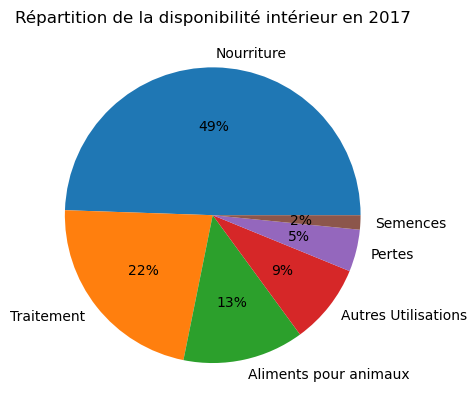

In [62]:
plt.pie(x=dispo_interieur_detail_data[0],labels=dispo_interieur_detail_data["index"],autopct='%.f%%')
plt.title("Répartition de la disponibilité intérieur en 2017")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [64]:
dispo_alimentaire_vegetale = (dispo_alimentaire.loc[dispo_alimentaire["Origine"]=="vegetale"])
liste_produit_vegetal = dispo_alimentaire_vegetale["Produit"].unique()
print(liste_produit_vegetal)


['Agrumes, Autres' 'Aliments pour enfants' 'Ananas' 'Bananes' 'Bière'
 'Blé' 'Boissons Alcooliques' 'Café' 'Coco (Incl Coprah)'
 'Céréales, Autres' 'Dattes' 'Edulcorants Autres' 'Feve de Cacao'
 'Fruits, Autres' 'Graines de coton' 'Graines de tournesol'
 'Huil Plantes Oleif Autr' 'Huile Graines de Coton' "Huile d'Arachide"
 "Huile d'Olive" 'Huile de Colza&Moutarde' 'Huile de Palme'
 'Huile de Soja' 'Huile de Sésame' 'Huile de Tournesol' 'Légumes, Autres'
 'Légumineuses Autres' 'Maïs' 'Miel' 'Millet' 'Miscellanees' 'Noix'
 'Olives' 'Oranges, Mandarines' 'Orge' 'Plantes Oleiferes, Autre' 'Poivre'
 'Pommes' 'Pommes de Terre' 'Raisin' 'Riz (Eq Blanchi)' 'Sucre Eq Brut'
 'Sucre, betterave' 'Sucre, canne' 'Sésame' 'Thé' 'Tomates' 'Vin'
 'Épices, Autres' 'Alcool, non Comestible' 'Arachides Decortiquees'
 'Avoine' 'Bananes plantains' 'Boissons Fermentés' 'Citrons & Limes'
 'Girofles' 'Graines Colza/Moutarde' 'Haricots' 'Huile de Coco'
 'Huile de Germe de Maïs' 'Huile de Palmistes' 'Ignames' 'M

In [65]:
#Création d'une liste avec toutes les variables
liste_cereales = ["Blé", "Céréales, Autres", 'Maïs','Millet','Orge','Riz (Eq Blanchi)','Avoine','Seigle','Sorgho']

In [66]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_alimentaire_cereales = dispo_alimentaire[dispo_alimentaire["Produit"].isin(liste_cereales)]
dispo_alimentaire_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


In [67]:
#Affichage de la proportion d'alimentation animale
dispo_interieur_cereal_sum = dispo_alimentaire_cereales["Disponibilité intérieure"].sum()
cereales_alimentation_animale_sum = dispo_alimentaire_cereales["Aliments pour animaux"].sum()
print("La proportion de céréales dans l'alimentation animale est de :", 
      round(cereales_alimentation_animale_sum/dispo_interieur_cereal_sum*100), "%")

La proportion de céréales dans l'alimentation animale est de : 36 %


In [68]:
#Affichage de la proportion d'alimentation animale
cereales_nourriture_sum = dispo_alimentaire_cereales["Nourriture"].sum()
print("La proportion decéréales dans la nourriture à destionantion humaine est de :",
      round(cereales_nourriture_sum/dispo_interieur_cereal_sum*100), "%")

La proportion decéréales dans la nourriture à destionantion humaine est de : 43 %


In [69]:
#graphique pour powerpoint
cereales_nourriture_sum_detail = dispo_alimentaire_cereales.groupby(["Produit"])["Nourriture"].sum()
cereales_nourriture_sum_detail_index = cereales_nourriture_sum_detail.reset_index().sort_values(by="Nourriture", ascending=False)

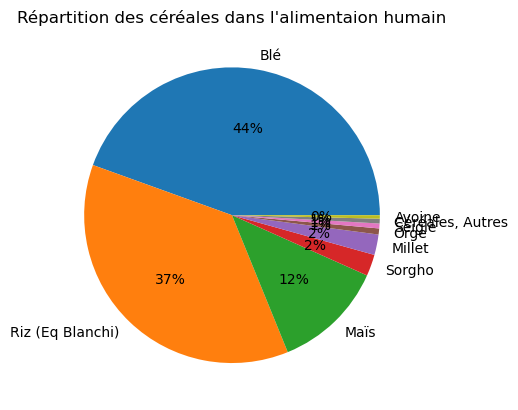

In [70]:
plt.pie(x=cereales_nourriture_sum_detail_index["Nourriture"],labels=cereales_nourriture_sum_detail_index["Produit"],autopct='%.f%%')
plt.title("Répartition des céréales dans l'alimentaion humain")
plt.show()

In [71]:
#Tableau pour power point
tableau_cereales_animaux_nourriture_sum = (dispo_alimentaire_cereales.groupby(["Produit"])[["Aliments pour animaux","Nourriture"]].sum()/1000000000).round(1)
tableau_cereales_animaux_nourriture_sum

,Aliments pour animaux,Nourriture
Produit,,
Avoine,16.3,3.9
Blé,129.7,457.8
"Céréales, Autres",19.0,5.3
Maïs,546.1,125.2
Millet,3.3,23.0
Orge,92.7,6.8
Riz (Eq Blanchi),33.6,377.3
Seigle,8.1,5.5
Sorgho,24.8,24.2


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [73]:
population_sous_nutrition_2017

,Zone,Population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0
...,...,...,...
198,Venezuela (République bolivarienne du),29402484.0,8000000.0
199,Viet Nam,94600648.0,6500000.0
200,Yémen,27834819.0,0.0
201,Zambie,16853599.0,0.0


In [74]:
#Création de la colonne proportion par pays
population_sous_nutrition_2017["Proportion"] = (population_sous_nutrition_2017["sous_nutrition"]
                                                /population_sous_nutrition_2017["Population"]*100).round(2)
#Attention, 119 pays sans problème de sous nutrition, on peut se poser des questions sur la qualité des données (ex: Yémen...)
print(population_sous_nutrition_2017[population_sous_nutrition_2017["sous_nutrition"]==0])

                   Zone  Population  sous_nutrition  Proportion
4             Allemagne  82658409.0             0.0         0.0
5               Andorre     77001.0             0.0         0.0
7    Antigua-et-Barbuda     95426.0             0.0         0.0
10              Arménie   2944791.0             0.0         0.0
11            Australie  24584620.0             0.0         0.0
..                  ...         ...             ...         ...
196             Uruguay   3436641.0             0.0         0.0
197             Vanuatu    285510.0             0.0         0.0
200               Yémen  27834819.0             0.0         0.0
201              Zambie  16853599.0             0.0         0.0
202            Zimbabwe  14236595.0             0.0         0.0

[119 rows x 4 columns]


In [75]:
#affichage après trie des 10 pires pays
classement_pays_sous_nutrition = population_sous_nutrition_2017.sort_values(by="Proportion", ascending=False)
print(classement_pays_sous_nutrition[["Zone","Proportion"]].head(10))

                                           Zone  Proportion
78                                        Haïti       48.26
157  République populaire démocratique de Corée       47.19
108                                  Madagascar       41.06
103                                     Libéria       38.28
100                                     Lesotho       38.25
183                                       Tchad       37.96
161                                      Rwanda       35.06
121                                  Mozambique       32.81
186                                 Timor-Leste       32.17
0                                   Afghanistan       28.93


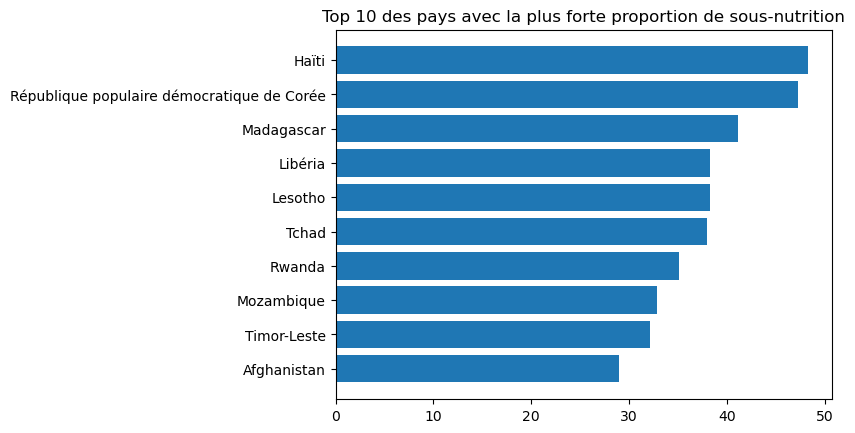

In [76]:
#Graphique pour power point
classement_pays_sous_nutrition_inverse = classement_pays_sous_nutrition.head(10).sort_values(by="Proportion", ascending=True)
plt.barh(width=classement_pays_sous_nutrition_inverse['Proportion'],
        y=classement_pays_sous_nutrition_inverse['Zone'])
plt.title("Top 10 des pays avec la plus forte proportion de sous-nutrition")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [78]:
aide_alimentaire

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000


In [79]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_pays = aide_alimentaire.groupby("Zone").sum()
aide_alimentaire_pays_reset = aide_alimentaire_pays.reset_index()
aide_alimentaire_zetv = aide_alimentaire_pays_reset.loc[:,["Zone", "Valeur"]]
print(aide_alimentaire_zetv)

           Zone      Valeur
0   Afghanistan   185452000
1       Algérie    81114000
2        Angola     5014000
3    Bangladesh   348188000
4       Bhoutan     2666000
..          ...         ...
71       Zambie     3026000
72     Zimbabwe    62570000
73       Égypte     1122000
74     Équateur     1362000
75     Éthiopie  1381294000

[76 rows x 2 columns]


In [80]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
top_aide_alimentaire = aide_alimentaire_zetv.sort_values(by="Valeur", ascending=False)
print(top_aide_alimentaire.head(10))

                                Zone      Valeur
50         République arabe syrienne  1858943000
75                          Éthiopie  1381294000
70                             Yémen  1206484000
61                     Soudan du Sud   695248000
60                            Soudan   669784000
30                             Kenya   552836000
3                         Bangladesh   348188000
59                           Somalie   292678000
53  République démocratique du Congo   288502000
43                             Niger   276344000


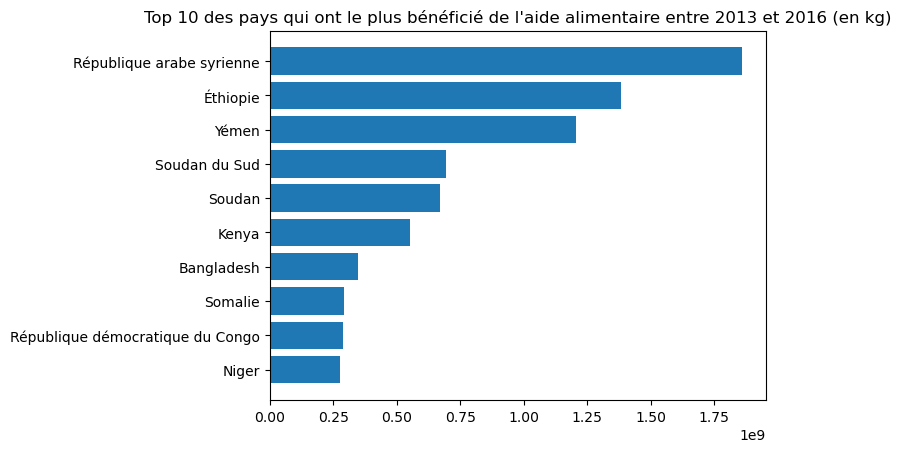

In [81]:
#graphique pour power point
top_aide_alimentaire_inverse = top_aide_alimentaire.head(10).sort_values(by="Valeur", ascending=True)
plt.barh(width=top_aide_alimentaire_inverse['Valeur'],
        y=top_aide_alimentaire_inverse['Zone'])
plt.title("Top 10 des pays qui ont le plus bénéficié de l'aide alimentaire entre 2013 et 2016 (en kg)")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [83]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_pays_année = aide_alimentaire.loc[:,["Zone","Année","Valeur"]].groupby(["Zone","Année"]).sum()

aide_alimentaire_pays_année

Valeur
Zone        Année           
Afghanistan 2013   128238000
            2014    57214000
Algérie     2013    35234000
            2014    18980000
            2015    17424000
...                      ...
Égypte      2013     1122000
Équateur    2013     1362000
Éthiopie    2013   591404000
            2014   586624000
            2015   203266000

[228 rows x 1 columns]

In [84]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_top5_aide_alimentaire = ["République arabe syrienne","Éthiopie","Yémen","Soudan du Sud","Soudan"]

In [85]:
#On filtre sur le dataframe avec notre liste
aide_alimentaire_pays_année_reset = aide_alimentaire_pays_année.reset_index()
aide_alimentaire_pays_année_top5 = aide_alimentaire_pays_année_reset[aide_alimentaire_pays_année_reset["Zone"].isin(liste_top5_aide_alimentaire)]
aide_alimentaire_pays_année_top5


,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [86]:
# Affichage des pays avec l'aide alimentaire par année
aide_alimentaire_pays_année_pivot_top5 = aide_alimentaire_pays_année_top5.pivot_table(index="Zone", columns="Année", values="Valeur")
aide_alimentaire_pays_année_pivot_top5

Année,2013,2014,2015,2016
Zone,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0
Soudan,330230000.0,321904000.0,17650000.0,NaN
Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN
Yémen,264764000.0,103840000.0,372306000.0,465574000.0
Éthiopie,591404000.0,586624000.0,203266000.0,NaN


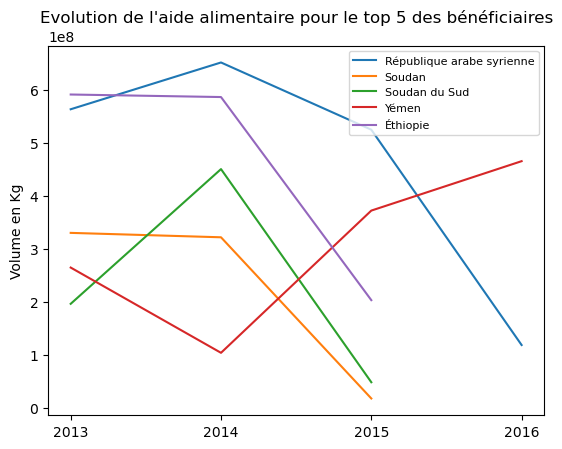

In [87]:
#graphique pour power point
for zone in aide_alimentaire_pays_année_top5['Zone'].unique():
    subset_zone = aide_alimentaire_pays_année_top5[aide_alimentaire_pays_année_top5['Zone'] == zone]
    plt.plot(subset_zone['Année'], subset_zone['Valeur'],label=zone)

plt.title("Evolution de l'aide alimentaire pour le top 5 des bénéficiaires")
plt.legend(fontsize=8)
plt.xticks([2013,2014,2015,2016])
plt.ylabel("Volume en Kg")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [89]:
population_dispo_alimentaire

,Zone,Population,Aliments pour animaux,Autres Utilisations,dispo_kcal,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-3.680000e+08
1,Afrique du Sud,57009756.0,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2.153000e+09
2,Albanie,2884169.0,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-4.500000e+07
3,Algérie,41389189.0,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-4.790000e+08
4,Allemagne,82658409.0,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-1.920000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),29402484.0,2.878000e+09,3.350000e+08,2633.0,652.86,82.44,72.96,3.228700e+10,6.200000e+07,9.604000e+09,1.985300e+10,1.190000e+09,2.386800e+10,9.100000e+07,7.957000e+09,-1.130000e+09
168,Viet Nam,94600648.0,1.135600e+10,3.815000e+09,2744.0,574.84,72.11,81.61,9.513400e+10,2.263800e+10,9.217000e+09,5.270000e+10,6.743000e+09,1.082750e+11,1.211000e+09,1.931100e+10,2.780000e+08
169,Yémen,27834819.0,2.100000e+08,7.200000e+07,2217.0,375.41,47.81,58.90,9.782000e+09,7.190000e+08,6.786000e+09,9.162000e+09,2.690000e+08,4.125000e+09,6.700000e+07,3.900000e+07,-4.080000e+08
170,Zambie,16853599.0,4.080000e+08,6.900000e+07,1924.0,350.12,42.05,55.22,1.004100e+10,6.750000e+08,3.800000e+08,5.088000e+09,2.420000e+08,1.052600e+10,7.600000e+07,4.178000e+09,-1.820000e+08


In [90]:
#Calcul de la disponibilité en kcal par personne par jour par pays
print(population_dispo_alimentaire[["Zone","dispo_kcal"]])


                                       Zone  dispo_kcal
0                               Afghanistan      2087.0
1                            Afrique du Sud      3020.0
2                                   Albanie      3188.0
3                                   Algérie      3293.0
4                                 Allemagne      3503.0
..                                      ...         ...
167  Venezuela (République bolivarienne du)      2633.0
168                                Viet Nam      2744.0
169                                   Yémen      2217.0
170                                  Zambie      1924.0
171                                Zimbabwe      2113.0

[172 rows x 2 columns]


In [91]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
top_min_dispo_alimentaire = population_dispo_alimentaire.sort_values(by="dispo_kcal", ascending=True)
print(top_min_dispo_alimentaire[["Zone","dispo_kcal"]].head(10))

                                           Zone  dispo_kcal
131                   République centrafricaine      1879.0
170                                      Zambie      1924.0
97                                   Madagascar      2056.0
0                                   Afghanistan      2087.0
70                                        Haïti      2089.0
136  République populaire démocratique de Corée      2093.0
156                                       Tchad      2109.0
171                                    Zimbabwe      2113.0
120                                     Ouganda      2126.0
55                                     Éthiopie      2129.0


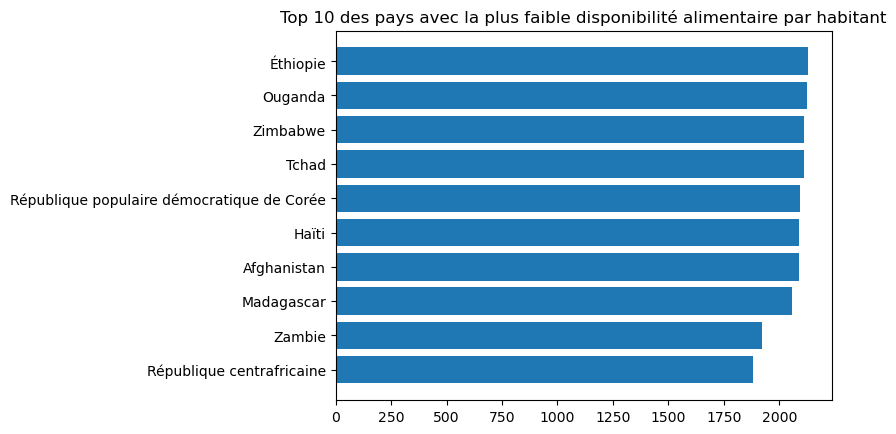

In [92]:
#Graphique pour power point
plt.barh(width=top_min_dispo_alimentaire[["Zone","dispo_kcal"]].head(10)['dispo_kcal'],
        y=top_min_dispo_alimentaire[["Zone","dispo_kcal"]].head(10)['Zone'])
plt.title("Top 10 des pays avec la plus faible disponibilité alimentaire par habitant")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [94]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
top_dispo_alimentaire = population_dispo_alimentaire.sort_values(by="dispo_kcal", ascending=False)
print(top_dispo_alimentaire[["Zone","dispo_kcal"]].head(10))

                      Zone  dispo_kcal
11                Autriche      3770.0
17                Belgique      3737.0
163                Turquie      3708.0
54   États-Unis d'Amérique      3682.0
80                  Israël      3610.0
78                 Irlande      3602.0
81                  Italie      3578.0
95              Luxembourg      3540.0
47                  Égypte      3518.0
4                Allemagne      3503.0


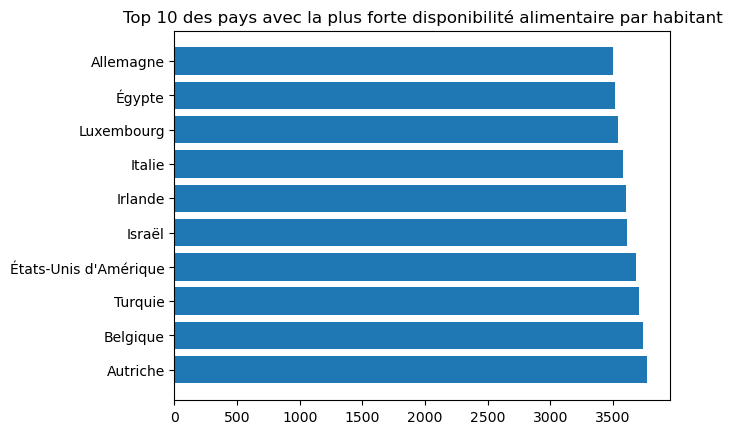

In [95]:
#Graphique pour power point
plt.barh(width=top_dispo_alimentaire[["Zone","dispo_kcal"]].head(10)['dispo_kcal'],
        y=top_dispo_alimentaire[["Zone","dispo_kcal"]].head(10)['Zone'])
plt.title("Top 10 des pays avec la plus forte disponibilité alimentaire par habitant")
plt.show()

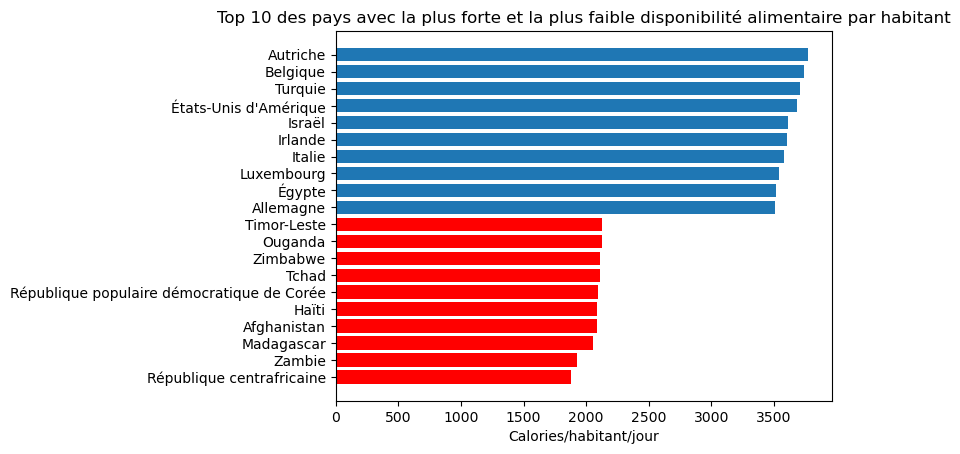

In [96]:
plt.barh(width=top_min_dispo_alimentaire[["Zone","dispo_kcal"]].head(10).sort_values(by="dispo_kcal", ascending=True)['dispo_kcal'],
        y=top_min_dispo_alimentaire.sort_values(by="dispo_kcal", ascending=True)[["Zone","dispo_kcal"]].head(10)['Zone'],color="red")
plt.barh(width=top_dispo_alimentaire[["Zone","dispo_kcal"]].head(10).sort_values(by="dispo_kcal", ascending=True)['dispo_kcal'],
        y=top_dispo_alimentaire[["Zone","dispo_kcal"]].head(10).sort_values(by="dispo_kcal", ascending=True)['Zone'])
plt.title("Top 10 des pays avec la plus forte et la plus faible disponibilité alimentaire par habitant")
plt.xlabel("Calories/habitant/jour")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [98]:
#création d'un dataframe avec uniquement la Thaïlande 
dataframe_Thailand = pd.merge(population_sous_nutrition_2017, dispo_alimentaire, on="Zone")
dataframe_Thailand = dataframe_Thailand[dataframe_Thailand["Zone"]=="Thaïlande"]
dataframe_Thailand

,Zone,Population,sous_nutrition,Proportion,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
14116,Thaïlande,69209810.0,6200000.0,8.96,Abats Comestible,animale,0.0,0.0,3.0,1.11,...,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0
14117,Thaïlande,69209810.0,6200000.0,8.96,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,...,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0
14118,Thaïlande,69209810.0,6200000.0,8.96,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,...,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0
14119,Thaïlande,69209810.0,6200000.0,8.96,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,...,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0
14120,Thaïlande,69209810.0,6200000.0,8.96,Ananas,vegetale,0.0,0.0,10.0,10.02,...,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,Thaïlande,69209810.0,6200000.0,8.96,Viande de Suides,animale,0.0,0.0,124.0,13.00,...,3.92,871000000.0,2.200000e+07,1000000.0,871000000.0,0.0,8.910000e+08,0.0,0.0,0.0
14207,Thaïlande,69209810.0,6200000.0,8.96,Viande de Volailles,animale,0.0,0.0,52.0,13.69,...,4.49,945000000.0,5.360000e+08,11000000.0,917000000.0,28000000.0,1.470000e+09,0.0,0.0,0.0
14208,Thaïlande,69209810.0,6200000.0,8.96,"Viande, Autre",animale,0.0,0.0,0.0,0.03,...,0.02,-92000000.0,9.600000e+07,4000000.0,2000000.0,0.0,0.000000e+00,0.0,0.0,0.0
14209,Thaïlande,69209810.0,6200000.0,8.96,Vin,vegetale,0.0,0.0,0.0,0.12,...,0.00,8000000.0,8.000000e+06,16000000.0,8000000.0,0.0,0.000000e+00,0.0,0.0,0.0


In [99]:
#Calcul de la sous nutrition en Thaïlande
print("La sous nutrition en Thaîlande représente", dataframe_Thailand["Proportion"].unique(), "% de la population")

La sous nutrition en Thaîlande représente [8.96] % de la population


In [100]:
dataframe_Thailand_manioc = dataframe_Thailand[dataframe_Thailand["Produit"]=="Manioc"]
dataframe_Thailand_manioc

,Zone,Population,sous_nutrition,Proportion,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
14166,Thaïlande,69209810.0,6200000.0,8.96,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,...,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [101]:
# On calcule la proportion exportée en fonction de la proportion
print("La Thaïlande exporte", (dataframe_Thailand_manioc["Exportations - Quantité"]/
                               dataframe_Thailand_manioc["Production"]*100),"% de ce qu'elle produit.")

La Thaïlande exporte 14166    83.41273
dtype: float64 % de ce qu'elle produit.


In [102]:
#print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(prop_sous_nutrition['Sous_nutrition'].sum()*100/prop_sous_nutrition['Population'].sum()), "%")

In [103]:

exportations = dataframe_Thailand_manioc.loc[14166, "Exportations - Quantité"]
production = dataframe_Thailand_manioc.loc[14166, "Production"]


pourcentage = (exportations / production) * 100

print(f"La Thaïlande exporte {pourcentage.round(2)}% de ce qu'elle produit.")

La Thaïlande exporte 83.41% de ce qu'elle produit.


In [104]:
dataframe_Thailand_manioc.iloc[0,-9:] = dataframe_Thailand_manioc.iloc[0,-9:]/1000000
dataframe_Thailand_manioc.iloc[0, 6:8] = dataframe_Thailand_manioc.iloc[0, 6:8]/1000000
dataframe_Thailand_manioc

,Zone,Population,sous_nutrition,Proportion,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
14166,Thaïlande,69209810.0,6200000.0,8.96,Manioc,vegetale,1800.0,2081.0,40.0,13.0,...,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [105]:
nourriture_manioc = dataframe_Thailand_manioc.loc[14166, "Nourriture"]
exportations_manioc = dataframe_Thailand_manioc.loc[14166, "Exportations - Quantité"]
ratio_nourriture_exportation = exportations_manioc/nourriture_manioc
print("Il y a", ratio_nourriture_exportation.round(), "fois plus de manioc exporté que de manioc qui sert à nourrir la population thailandaise")

dispo_alimentaire_manioc = dataframe_Thailand_manioc.loc[14166, "Disponibilité alimentaire (Kcal/personne/jour)"]
equivalent_exportation_manioc_dispo_alimentaire = dispo_alimentaire_manioc*ratio_nourriture_exportation
proportion_besoin_alimentaire = equivalent_exportation_manioc_dispo_alimentaire/2940*100
print("Les exportations représentent l'équivalent de", equivalent_exportation_manioc_dispo_alimentaire.round(),
      "Kcal/personne/jour, c'est à dire,",proportion_besoin_alimentaire.round(),
      "% des besoins alimentaires (en calories) de la population thailandaise") 


Il y a 29.0 fois plus de manioc exporté que de manioc qui sert à nourrir la population thailandaise
Les exportations représentent l'équivalent de 1158.0 Kcal/personne/jour, c'est à dire, 39.0 % des besoins alimentaires (en calories) de la population thailandaise


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [107]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

#Recherche sur le rapport exportation/nourriture et sous alimentation
top_min_dispo_alimentaire["Proportion exp/nourriture"] = (top_min_dispo_alimentaire["Exportations - Quantité"]/top_min_dispo_alimentaire["Nourriture"]*100).round(1)
Tableau_exp_nourriture = top_min_dispo_alimentaire[["Zone","Proportion exp/nourriture","dispo_kcal"]]

Tableau_exp_nourriture_reset = Tableau_exp_nourriture.reset_index()

In [108]:
Tableau_exp_nourriture_reset[Tableau_exp_nourriture_reset["Proportion exp/nourriture"]>10].head(20)

,index,Zone,Proportion exp/nourriture,dispo_kcal
1,170,Zambie,13.3,1924.0
11,111,Namibie,55.9,2166.0
19,21,Bolivie (État plurinational de),32.5,2250.0
21,68,Guinée-Bissau,33.0,2288.0
23,53,Eswatini,107.1,2326.0
25,50,Équateur,93.3,2346.0
27,73,Îles Salomon,32.6,2383.0
30,66,Guatemala,96.5,2416.0
32,122,Pakistan,10.2,2438.0
35,145,Sénégal,10.3,2453.0


In [109]:
Tableau_exp_nourriture_reset[Tableau_exp_nourriture_reset["Proportion exp/nourriture"]>100].head(10)

,index,Zone,Proportion exp/nourriture,dispo_kcal
23,53,Eswatini,107.1,2326.0
51,124,Paraguay,241.9,2584.0
76,18,Belize,216.6,2746.0
81,157,Thaïlande,128.4,2785.0
86,26,Bulgarie,185.2,2828.0
89,40,Costa Rica,189.5,2846.0
94,98,Malaisie,158.5,2914.0
101,148,Slovaquie,104.4,2943.0
110,72,Hongrie,150.8,3034.0
113,165,Uruguay,307.7,3052.0


In [110]:
ajout_sous_nutrition = pd.merge(Tableau_exp_nourriture_reset,population_sous_nutrition_2017[["Zone","Proportion"]],on="Zone")

In [111]:
tableau_proportion_expnourriture_sousnutrition =ajout_sous_nutrition.rename(columns={"Proportion":"Proportion sous alimentation"})

In [112]:
tableau_proportion_expnourriture_sousnutrition[tableau_proportion_expnourriture_sousnutrition["Proportion exp/nourriture"]>10].head(10)

,index,Zone,Proportion exp/nourriture,dispo_kcal,Proportion sous alimentation
1,170,Zambie,13.3,1924.0,0.00
11,111,Namibie,55.9,2166.0,12.49
19,21,Bolivie (État plurinational de),32.5,2250.0,15.19
21,68,Guinée-Bissau,33.0,2288.0,0.00
23,53,Eswatini,107.1,2326.0,17.78
25,50,Équateur,93.3,2346.0,8.94
27,73,Îles Salomon,32.6,2383.0,0.00
30,66,Guatemala,96.5,2416.0,15.96
32,122,Pakistan,10.2,2438.0,11.93
35,145,Sénégal,10.3,2453.0,9.73


In [113]:
tableau_proportion_expnourriture_sousnutrition[tableau_proportion_expnourriture_sousnutrition["Proportion exp/nourriture"]>100].head(10)

,index,Zone,Proportion exp/nourriture,dispo_kcal,Proportion sous alimentation
23,53,Eswatini,107.1,2326.0,17.78
51,124,Paraguay,241.9,2584.0,8.74
76,18,Belize,216.6,2746.0,0.00
81,157,Thaïlande,128.4,2785.0,8.96
86,26,Bulgarie,185.2,2828.0,2.82
89,40,Costa Rica,189.5,2846.0,4.04
94,98,Malaisie,158.5,2914.0,3.21
101,148,Slovaquie,104.4,2943.0,5.51
110,72,Hongrie,150.8,3034.0,0.00
113,165,Uruguay,307.7,3052.0,0.00
